## **Contents of the Workbook :**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Step - 1 :** *Importing Necesaary Libraries and Datasets*

### **Step - 1.1 :** *Importing Necesaary Packages & Libraries*

In [ ]:
!pip install import_ipynb
!pip install -q -U "tensorflow-text==2.8.*"


In [1]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

# Scikit-learn

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score


# Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM, Bidirectional
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('omw-1.4')

# Word2vec
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec


# Utility
import string
import re
import numpy as np
import os
import logging
import time
import pickle
import itertools
import random
import datetime

# WordCloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter, defaultdict

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Warnings
import warnings 
warnings.filterwarnings('ignore')

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)



%cd '/content/drive/MyDrive/CDAC-SELF/CDAC_PROJECT/Mental_Graph_Of_User_Using_Social_Media_Posts/project_code/src/'

import import_ipynb
import preprocessing_module as preprocessing
import visualization_module as visualization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


/content/drive/MyDrive/CDAC-SELF/CDAC_PROJECT/Mental_Graph_Of_User_Using_Social_Media_Posts/project_code/src
importing Jupyter notebook from preprocessing_module.ipynb
importing Jupyter notebook from visualization_module.ipynb


### **Step - 1.2 :** *Declaring Variables*

In [2]:
# Varaibles related to dataset

TRAIN_SIZE = 0.8

# Parameters related to KERAS
SEQUENCE_LENGTH = 150
EPOCHS = 20
BATCH_SIZE = 64

# Variables for Exporting purpose
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "/content/tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

# MISC
plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250

csv_folder_path = '/content/drive/MyDrive/CDAC-SELF/CDAC_PROJECT/Mental_Graph_Of_User_Using_Social_Media_Posts/project_code/files/labelled'
model_path = '/content/drive/MyDrive/CDAC-SELF/CDAC_PROJECT/Mental_Graph_Of_User_Using_Social_Media_Posts/project_code/src/model/final/model.h5'
TOKENIZER_MODEL = "/content/drive/MyDrive/CDAC-SELF/CDAC_PROJECT/Mental_Graph_Of_User_Using_Social_Media_Posts/project_code/src/model/tokenizer.pkl"



## **Step - 2 :** *Data Pre-processing*

### **Step - 2.1 :** Import Cleaning functions from Preprocessing module file

In [3]:
##preprocessing-starts

df = preprocessing.concat_csvs(csv_folder_path)
df = preprocessing.drop_duplicates(df)
df = preprocessing.drop_na_values_category(df)
df = preprocessing.cleaning(df)

In [4]:
df.head()

,username,orig_sentence,cleaned_sentence,category,sub-category
0,ytComments_Common Indian,"Salute to the extraordinary resolve, stamina a...",salute extraordinary resolve stamen courage co...,positive,NaN
1,ytComments_Course Facilitator,RSS is down now! Modi ki kacchi on fire too! N...,r modi ki kacchi fire might talk kacchi baat n...,negative,criticism
2,ytComments_Akhi Sucs,BJP BHAGAO DESH BACHAO,bjp bhagao desh bachao,negative,criticism
3,ytComments_kumarvinay,Don't worry sambit patra jald hi satta hath se...,dont worry sambit patra jald hi satta hath se ...,negative,criticism
4,ytComments_Tinku Tanveer,Joor ka jhatka dhire se\nJai ho Congress,joor ka jhatka dhire se jai ho congress,positive,NaN


### **Step - 2.2 :** Outputting Cleaned CSV File

In [5]:
#outputting merged cleaned csv
preprocessing.output_merged_cleaned_csv(df)

In [6]:
print("DataFrame Shape:",df.shape)
df.describe()

#preprocessing-ends

DataFrame Shape: (3073, 5)


,username,orig_sentence,cleaned_sentence,category,sub-category
count,3073,3073,3073,3073,1719
unique,2473,2935,2764,2,2
top,tweets_arunjeba,Rahul Gandhi is definitely the future of India...,gujarat model mean countrys beautiful river fr...,negative,criticism
freq,28,5,13,1740,1505


### **Step - 2.3 :** Plotting Class Distribution

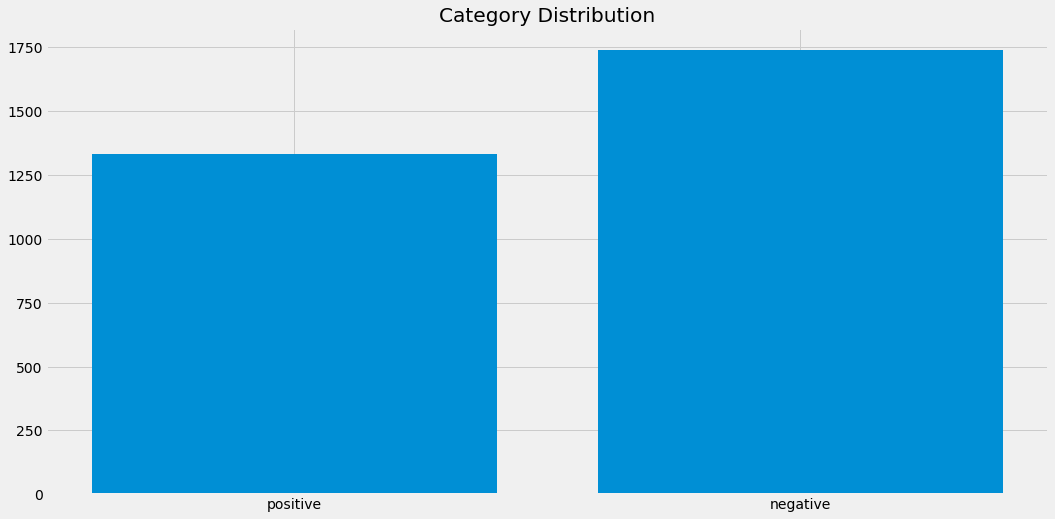

In [7]:
#Plotting Class Distribution-part1

#Calling Visualization function from Visualization module File

visualization.plot_category_counts(df['category'], title = "Category Distribution")

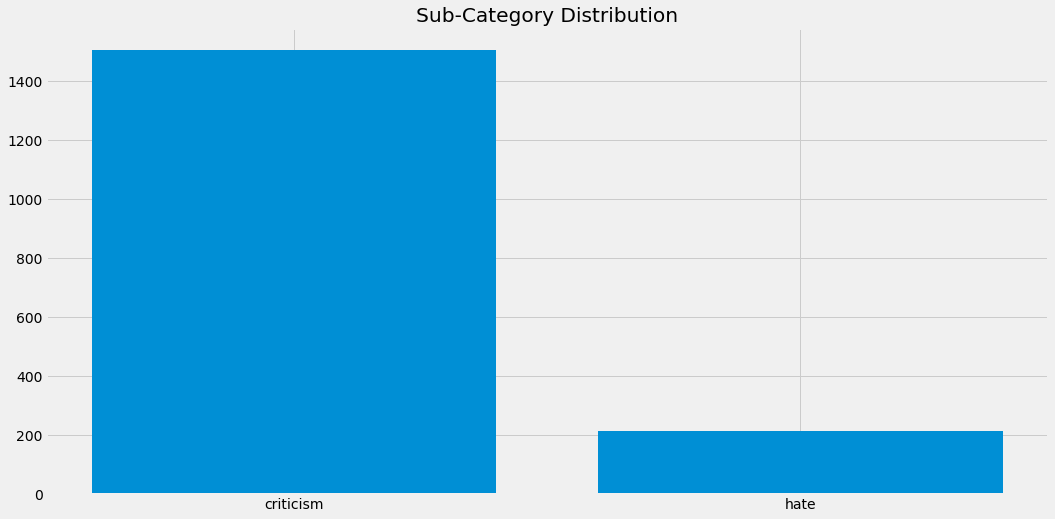

In [8]:
#Plotting Class Distribution-part2

import copy
subc_df = copy.deepcopy(df)
subc_df = preprocessing.drop_na_values_subcategory(subc_df)

visualization.plot_category_counts(subc_df['sub-category'],  title = "Sub-Category Distribution")


### **Step - 2.3 :** Plotting Word Cloud

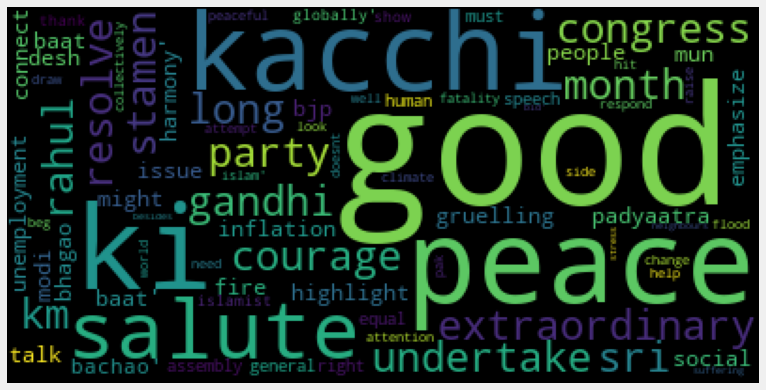

In [9]:
def plot_wordcloud(df):

    # text = open('/content/drive/MyDrive/CDAC-SELF/CDAC_PROJECT/Mental_Graph_Of_User_Using_Social_Media_Posts/project_code/files/cleaned/merged_cleaned.csv').read()
    
    # text = df['cleaned_sentence'].astype("string")
    # text = str(df.cleaned_sentence)
    text = str(df['cleaned_sentence'].values)


    wordcloud = WordCloud().generate(text)


    # Generate plot
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

plot_wordcloud(df)


### **Step - 2.4 :** Train-Test Split

In [10]:
df_train, df_test = preprocessing.splitting_train_test(df, TRAIN_SIZE)

encoder, y_train, y_test = preprocessing.labelEncoding_target_variables(df_train, df_test)

TRAIN size: 2458
TEST size: 615
y_train (2458, 1)
y_test (615, 1)


## **Step - 3 :** *Applying Word2Vec Embedding*

In [11]:
#word2vec
W2V_SIZE=200 #Embedding size
W2V_EPOCH=60 

w2v_model, w2v_weights, w2v_vocab_size, w2v_embedding_size = preprocessing.create_Word2Vec_embedding(df_train, W2V_EPOCH, W2V_SIZE)

print("Vocabulary Size: {} - Embedding Dim: {}".format(w2v_vocab_size, w2v_embedding_size))
print('Word2Vec_weights Shape:',w2v_weights.shape)

Vocabulary Size: 1601 - Embedding Dim: 200
Word2Vec_weights Shape: (1601, 200)


In [12]:
#testing similar words from word2vec embeddings
w2v_model.wv.most_similar("minister")

[('chief', 0.9339273571968079),
 ('prime', 0.8653802871704102),
 ('sack', 0.8445534706115723),
 ('quit', 0.8236913084983826),
 ('drop', 0.8035279512405396),
 ('abdullah', 0.7913070321083069),
 ('former', 0.7774844169616699),
 ('drag', 0.7715543508529663),
 ('shah', 0.7554566860198975),
 ('member', 0.7543553113937378)]

In [13]:
w2v_model.wv.most_similar("narendra")

[('press', 0.8051015138626099),
 ('modi', 0.7595682144165039),
 ('fascist', 0.7313659191131592),
 ('card', 0.721916913986206),
 ('conference', 0.7058688998222351),
 ('fire', 0.7056266069412231),
 ('next', 0.7030786275863647),
 ('organisation', 0.6997541189193726),
 ('wing', 0.6975460052490234),
 ('independence', 0.6968438029289246)]

### **Step - 5.1 :** Token and Vocab Creation

In [14]:
#Creating Token from words
vocab_size, tokenizer = preprocessing.tokenizing(df_train) 

In [15]:
#Converting Text to sequence and added padding
x_train, x_test = preprocessing.converting_txt2seq(tokenizer, df_train, df_test, SEQUENCE_LENGTH)

In [16]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (2458, 150)
y_train (2458, 1)

x_test (615, 150)
y_test (615, 1)


## STEP 5.1.2 Visualizing Word2Vec Embeddings with t-SNE

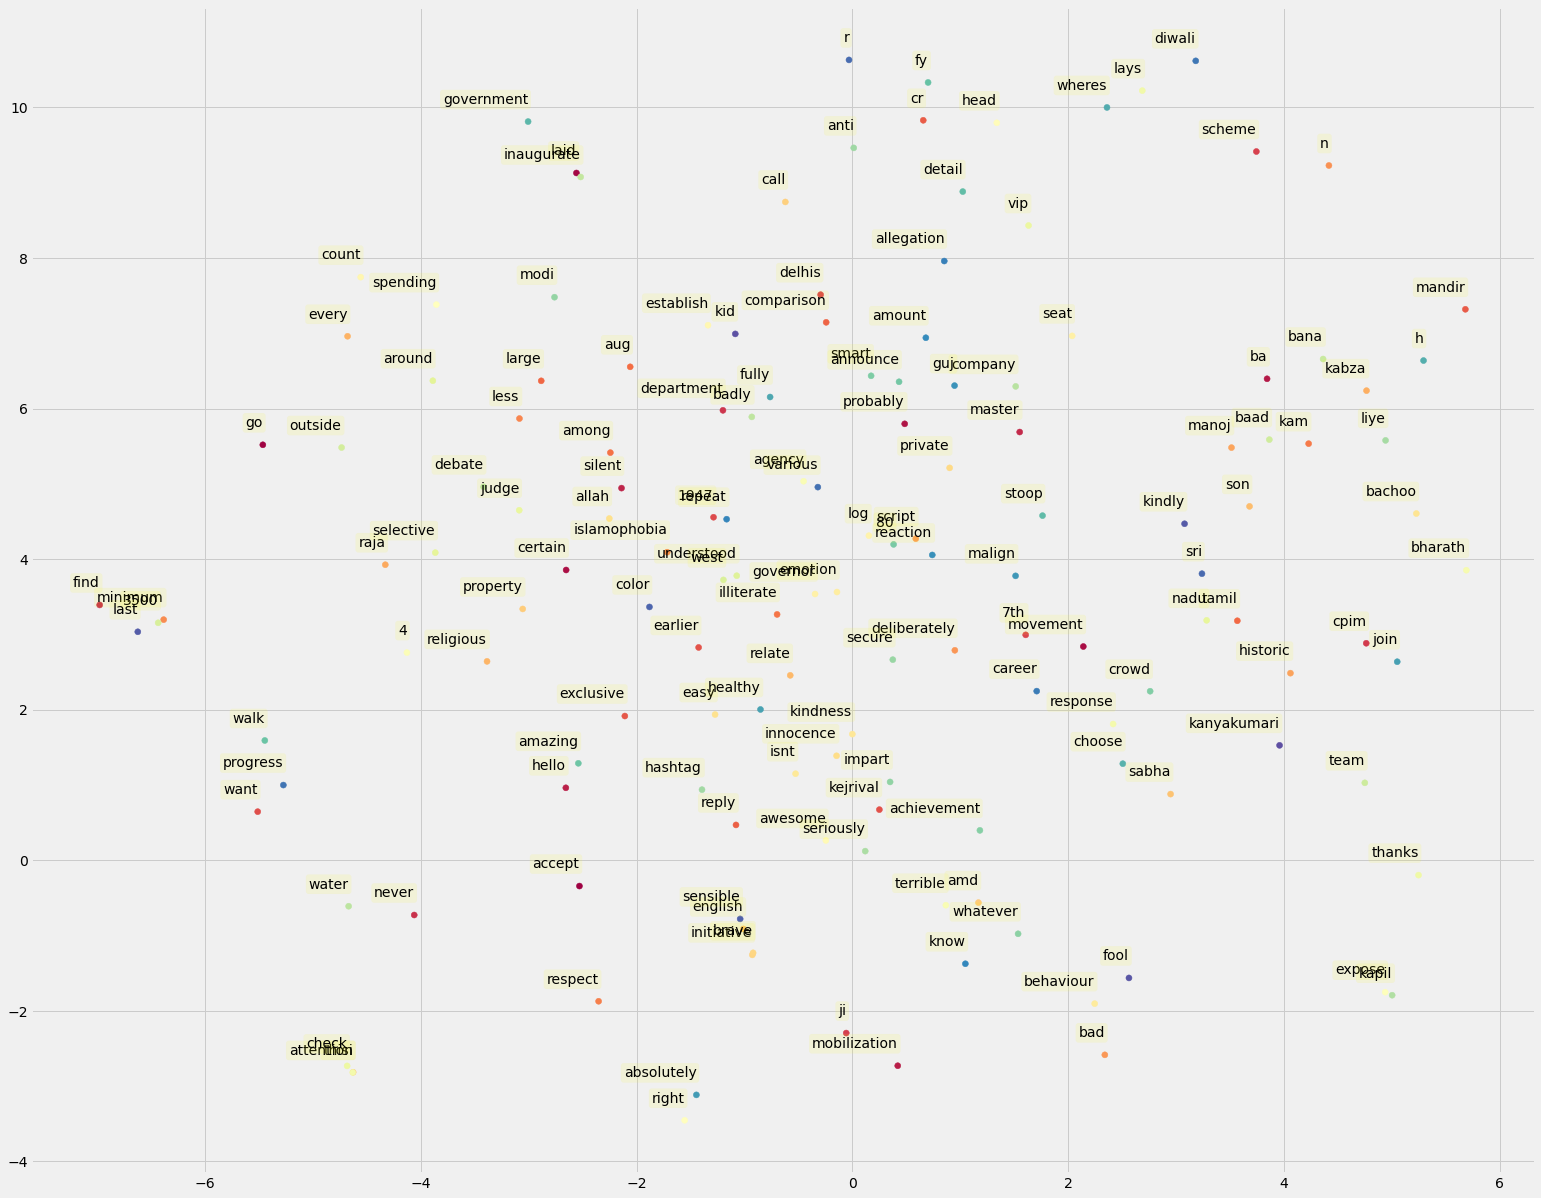

In [17]:
plot_n_words = 150
visualization.plot_word2vec_embedding_by_tsne(w2v_model, w2v_vocab_size, plot_n_words)

### **Step - 5.3 :** Embedding Layer Creation

In [18]:
embedding_matrix = preprocessing.create_embeddingMatrix_from_Word2Vec(w2v_model, vocab_size, W2V_SIZE, tokenizer)

### **Step - 5.4 :** Model Creation - LSTM

In [19]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=w2v_embedding_size,
                    weights=[embedding_matrix],
                    input_length=SEQUENCE_LENGTH,
                    mask_zero=True,
                    trainable=False))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(8, dropout=0.2)))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 200)          1079600   
                                                                 
 dropout (Dropout)           (None, 150, 200)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 16)               13376     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1,092,993
Trainable params: 13,393
Non-trainable params: 1,079,600
_________________________________________________________________


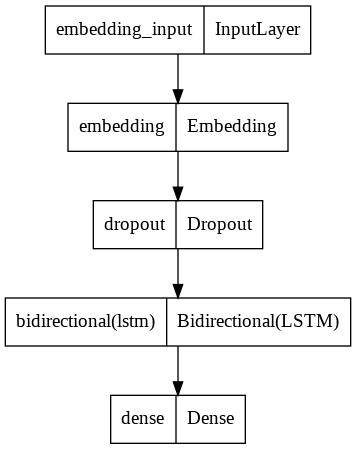

In [20]:
tf.keras.utils.plot_model(model)

### **Step - 5.5 :** Compiling Model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=2, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

### **Step - 5.7 :** Model Training 

In [ ]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=20,
                    validation_split=0.1,
                    verbose=1
                    )

Epoch 1/20
35/35 [==============================] - 24s 398ms/step - loss: 0.5837 - accuracy: 0.6854 - val_loss: 0.5550 - val_accuracy: 0.6992
Epoch 2/20
35/35 [==============================] - 11s 323ms/step - loss: 0.5024 - accuracy: 0.7500 - val_loss: 0.5045 - val_accuracy: 0.7317
Epoch 3/20
35/35 [==============================] - 8s 230ms/step - loss: 0.4815 - accuracy: 0.7608 - val_loss: 0.4944 - val_accuracy: 0.7683
Epoch 4/20
35/35 [==============================] - 8s 240ms/step - loss: 0.4655 - accuracy: 0.7703 - val_loss: 0.4956 - val_accuracy: 0.7683
Epoch 5/20
35/35 [==============================] - 9s 270ms/step - loss: 0.4565 - accuracy: 0.7740 - val_loss: 0.4875 - val_accuracy: 0.7805
Epoch 6/20
35/35 [==============================] - 9s 248ms/step - loss: 0.4446 - accuracy: 0.7798 - val_loss: 0.4797 - val_accuracy: 0.7683
Epoch 7/20
35/35 [==============================] - 11s 307ms/step - loss: 0.4393 - accuracy: 0.7871 - val_loss: 0.4830 - val_accuracy: 0.7561
Epo

### **Step - 5.8 :** Model Evaluation 

In [ ]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

5/5 [==============================] - 0s 67ms/step - loss: 0.4392 - accuracy: 0.7935

ACCURACY: 0.7934959530830383
LOSS: 0.43923240900039673
CPU times: user 655 ms, sys: 37.1 ms, total: 692 ms
Wall time: 690 ms


Plotting Model Performance

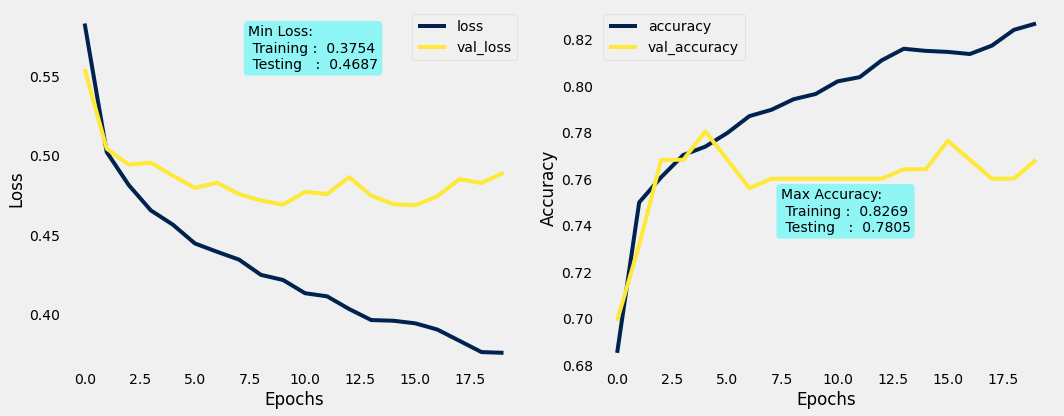

In [ ]:
hist_df = pd.DataFrame(history.history)
visualization.plot_model_performance_graph(hist_df)

In [ ]:
#Saving Model

model.save(model_path)
# w2v_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
# pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)

In [ ]:
model_loaded = tf.keras.models.load_model(model_path)

model_loaded.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 150, 200)          1079600   
                                                                 
 dropout_11 (Dropout)        (None, 150, 200)          0         
                                                                 
 bidirectional_10 (Bidirecti  (None, 16)               13376     
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,092,993
Trainable params: 13,393
Non-trainable params: 1,079,600
_________________________________________________________________


In [ ]:
def pred_score2label(y_pred_score):
    y_pred_conf_score,y_pred_num , y_pred_label = [], [], []
    for i in y_pred_score:
        if i<=0.5:
            pred_label = 0
            pred_score = i + 0.5
        else:
            pred_label = 1
            pred_score = i

        y_pred_num.append(pred_label)
        y_pred_conf_score.append(pred_score)

        pred_li_temp = [pred_label]
        y_pred_temp =  list(encoder.inverse_transform(pred_li_temp) )

        y_pred_label.append(y_pred_temp)
    return y_pred_conf_score, y_pred_num, y_pred_label

y_pred_score = model_loaded.predict(x_test)
y_pred_conf_score,y_pred_num, y_pred_label = pred_score2label(y_pred_score)


    # print(type(i))

In [ ]:
# (y_pred_num[:4], y_pred_label[:4])
y_test = [i[0] for i in y_test]
y_test[:4], y_pred_conf_score[:4]

([0, 1, 0, 0],
 [array([0.85078573], dtype=float32),
  array([0.578773], dtype=float32),
  array([0.5052674], dtype=float32),
  array([0.99563396], dtype=float32)])

In [ ]:
# x_test = [i[0] for i in x_test]

In [ ]:
(x_test)

array([[   0,    0,    0, ...,  403,  209,   29],
       [   0,    0,    0, ...,   33,  522,   85],
       [   0,    0,    0, ...,    3,  243,   22],
       ...,
       [   0,    0,    0, ...,   87,   73,    7],
       [   0,    0,    0, ...,    3, 1274,    4],
       [   0,    0,    0, ...,  232,   12,  329]], dtype=int32)

In [ ]:
def output_pred_csv(df_test, y_pred_conf_score, y_pred_label):

    sent = df_test.cleaned_sentence.tolist()
    y_pred_conf_score = [i[0] for i in y_pred_conf_score]
    y_pred_label = [i[0] for i in y_pred_label]

    pred_df = pd.DataFrame(list(zip(sent, y_pred_conf_score, y_pred_label)), columns =['Sentence', 'confidence_score', 'y_pred_label'])
    pred_df.to_csv(r'/content/pred_df.csv', index=False)

    return pred_df

output_pred_csv(df_test, y_pred_conf_score, y_pred_label)    

,Sentence,confidence_score,y_pred_label
0,people not happy pay attention thisi think bes...,0.798794,positive
1,big news expose kapil mishra kapil ji go ahead...,0.750892,positive
2,misleading water fund public kejriwal work get...,0.506940,negative
3,first make unity party go country,0.524957,positive
4,asianet wonderful job people report well good ...,0.770643,positive
...,...,...,...
610,e topiwala ko afghanisthan ko bhej modiji happ...,0.704832,negative
611,bias visible yet,0.647884,positive
612,kapil mishra expose arvind kejriwal need know ...,0.550225,negative
613,kapil sir expose kejriwal sir work delhi gover...,0.537130,negative


In [ ]:
classification_report = classification_report(y_test, y_pred_num) 
print(classification_report)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       344
           1       0.76      0.78      0.77       271

    accuracy                           0.79       615
   macro avg       0.79      0.79      0.79       615
weighted avg       0.79      0.79      0.79       615



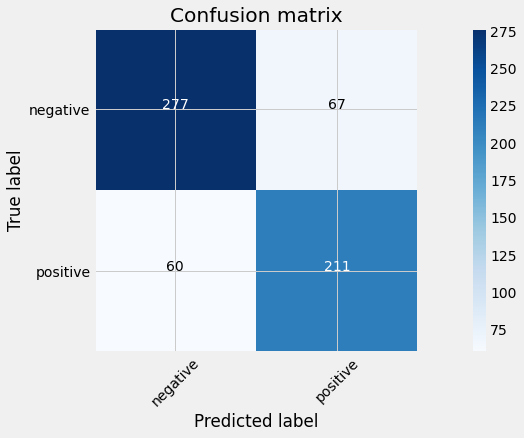

In [ ]:

confusion_mtx  = confusion_matrix(y_test, y_pred_num)

visualization.plot_confusion_matrix(confusion_mtx, classes =['negative', 'positive']) 

